# 2nd lab from _'Investment-Management-with-Python-and-Machine-Learning-Specialization'_.

**Topic:** _Risk Adjusted Returns_ 

In [10]:
import pandas as pd
import numpy as np
prices = pd.read_csv(r'C:\Users\User\Desktop\sample_prices.csv')
returns = prices.pct_change()

In [4]:
returns

,BLUE,ORANGE
1,NaN,NaN
2,0.023621,0.039662
3,-0.021807,-0.033638
4,-0.031763,0.082232
5,0.034477,0.044544
6,0.037786,-0.026381
7,-0.011452,-0.049187
8,0.032676,0.117008
9,-0.012581,0.067353
10,0.029581,0.078249


We can clear the NaN row by simply using **.dropna** function.

In [5]:
returns = returns.dropna()
returns

,BLUE,ORANGE
2,0.023621,0.039662
3,-0.021807,-0.033638
4,-0.031763,0.082232
5,0.034477,0.044544
6,0.037786,-0.026381
7,-0.011452,-0.049187
8,0.032676,0.117008
9,-0.012581,0.067353
10,0.029581,0.078249
11,0.006151,-0.168261


**1) VOLATILITY ASSESSMENT** <p>
A first risk index of a stock is the **standard deviation** of its **returns**, which is simply computed as it follows. 

In [7]:
volatility = returns.std()

In [8]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

**2)ANNUALIZED VOLATILITY ASSESSMENT** <p>
First of all, the annualized volatility is defined by: 
    $$ \sigma_A=\sigma \cdot \sqrt{p} $$
It is given by multiplying the known volatility (in our example it is based on monthly data) by the number of periods in a year (in our case p=12).

In [12]:
annualized_volatility = volatility*np.sqrt(12)
annualized_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### Portfolios dataset

This dataset contains monthly returns on different stocks in percentage format.(i.e. : 1.6 means a 1.6% return).

In [36]:
returns = pd.read_csv(r'C:\Users\User\Desktop\Python\IM with Python\data\Portfolios_Formed_on_ME_monthly_EW.csv',
                     header = 0, index_col = 0, na_values = -99.99)
returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In order to have a quick description of our dataset we can use the **np.shape()** function. It outputs a tuple with (#rows,#columns).

In [37]:
np.shape(returns)

(1110, 19)

To only visualize some specifical columns:

In [38]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


The **.head()** function outputs the first 5 rows of the dataset.

In order to have decimal percentage, we simply divide the datset by 100:

In [39]:
returns=returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


We can easily change columns name by simply assigning them whatever name we want:

In [40]:
returns.columns = ['Small Cap', 'Large Cap']
returns.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

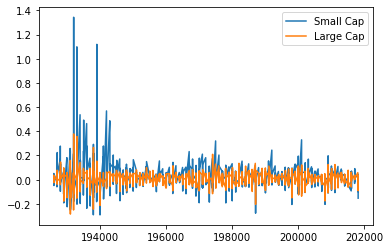

In [41]:
returns.plot()

By looking at this plot, we can grasp that Large Cap is way less volatile than Small Cap. We can confirm that by simply computing their **std()**.

In [42]:
returns.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

Annualized volatility is

In [43]:
annualized_vol = returns.std()*np.sqrt(12)

In [44]:
annualized_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

The **return per month**:

In [45]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months)-1
return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

**Annualized return** instead: 

In [47]:
annualized_return = (return_per_month+1)**12 -1
annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

Two different ratios are useful in order to assess a risk adjusted return. The first one is the **return to risk ratio**
$$ \frac{return}{volatility} $$
By the way, a more precise ratio is the **SHARPE RATIO** which is defined by:
$$S_a=\frac{excess return}{volatility}=\frac{return - risk free rate}{volatility}=\frac{R_p-R_f}{\sigma_p}$$

In [49]:
annualized_return/annualized_vol

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

Let's assume a risk free rate of 0.03

In [50]:
rfr=0.03
(annualized_return-rfr)/annualized_vol

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

By looking at the sharpe ratio, *Small Cap stocks gave a slightly greater adjusted return over Large Cap stocks* when comparing deciles.